# Sample Superstore Data Exploration by Chinedu Ogbozor

### About the dataset

The Sample Superstore dataset is a fictional dataset commonly used for educational and practice purposes in data analysis and visualization. This dataset typically includes information related to sales, profitability, and other business metrics. Here is an overview of the dataset with the specified columns:

1. **Order ID:** A unique identifier for each order placed in the sample superstore.

2. **Order Date:** The date when the order was placed.

3. **Ship Date:** The date when the order was shipped.

4. **Ship Mode:** The mode of shipment selected for the order, such as Standard Class, Second Class, First Class, or Same Day.

5. **Customer ID:** A unique identifier for each customer.

6. **Customer Name:** The name of the customer placing the order.

7. **Segment:** The market segment to which the customer belongs, such as Consumer, Corporate, or Home Office.

8. **Country:** The country where the sample superstore operates.

9. **City:** The city where the customer is located.

10. **State:** The state where the customer is located.

11. **Postal Code:** The postal code of the customer's location.

12. **Region:** The geographical region (East, West, North, South) where the customer is located.

13. **Product ID:** A unique identifier for each product in the store.

14. **Category:** The product category, such as Furniture, Office Supplies, or Technology.

15. **Sub-Category:** Further classification of the product under the main category.

16. **Product Name:** The name of the product.

17. **Sales:** The total sales amount for the product.

18. **Quantity:** The quantity of the product ordered.

19. **Discount:** The discount applied to the product.

20. **Profit:** The profit earned from the sale of the product.

The Sample Superstore dataset is commonly used for practicing data cleaning, exploration, and analysis tasks, making it a valuable resource for individuals learning or working in the field of data science and analytics. It provides a diverse set of information related to customer behavior, sales patterns, and product performance, allowing analysts to derive insights and make data-driven decisions.

## Problem Statement 
#### Level 1
1. Find relationdhip between data
2. Which city did we have the highest sales
3. Which category made the most profit
4. Find the mean quantity order and visualize it

     4b. Does discount or quanity infleunce profit

#### Level 2
1. Analyze the profit of various categories
2. Analyse the trend of sales by months and year
3. How much sales occurs in each and every category with respect to each and every month

#### Level 3
1. Relationship between Profit and Product Sub-category
2. Visulaze how customers prefer to ship their other
3. Does customer segement infleunce sales
4. Display some popular brand in our products based on customer order

In [2]:
# store.columns.values.tolist() used to get the row names as a list

### Let us start by importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Overveiw of data and column data types

In [4]:
store = pd.read_csv(r"C:\Users\48668\OneDrive\Pulpit\portfolioProject\Sample_Superstore.csv", encoding='windows-1252')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Coverting dataes from object to timestamp

In [6]:
store['Order Date'] = pd.to_datetime(store['Order Date'], dayfirst = True)

In [7]:
type(store['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
store['Ship Date'] = pd.to_datetime(store['Ship Date'], dayfirst = True)

In [9]:
store['Ship Date'].dtype

dtype('<M8[ns]')

In [10]:
store.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Spliting order date to get the day, month and year in different columns

In [11]:
# define a function that takes x;timestamp data and return day, month and year as a pandas series
def fetch_att(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day, month, year])

In [12]:
# use above function to add day, month and year to our dataframe
store[['order day', 'order month', 'order year']] = store['Order Date'].apply(fetch_att)

In [13]:
store.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order day,order month,order year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,11,2016


### Overview of data description

In [14]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976
order day,9994.0,15.468481,8.748327,1.000,8.00000,15.0000,23.000,31.000
order month,9994.0,7.809686,3.284654,1.000,5.00000,9.0000,11.000,12.000
order year,9994.0,2015.722233,1.123555,2014.000,2015.00000,2016.0000,2017.000,2017.000


### Problem Statement
### Level 1
1. Find relationdhip between data
2. Which city did we have the highest sales
3. Which category made the most profit
4. find the mean discount and visualize it
5. What is the relationship between discount and profit

#### 1. Find relationdhip between data

In [15]:
# Filter out column with numerical values for correlation analysis
store_rel = store.filter(items=['Sales', 'Quantity', 'Discount', 'Profit', 'order day', 'order month', 'order year'])

<Axes: >

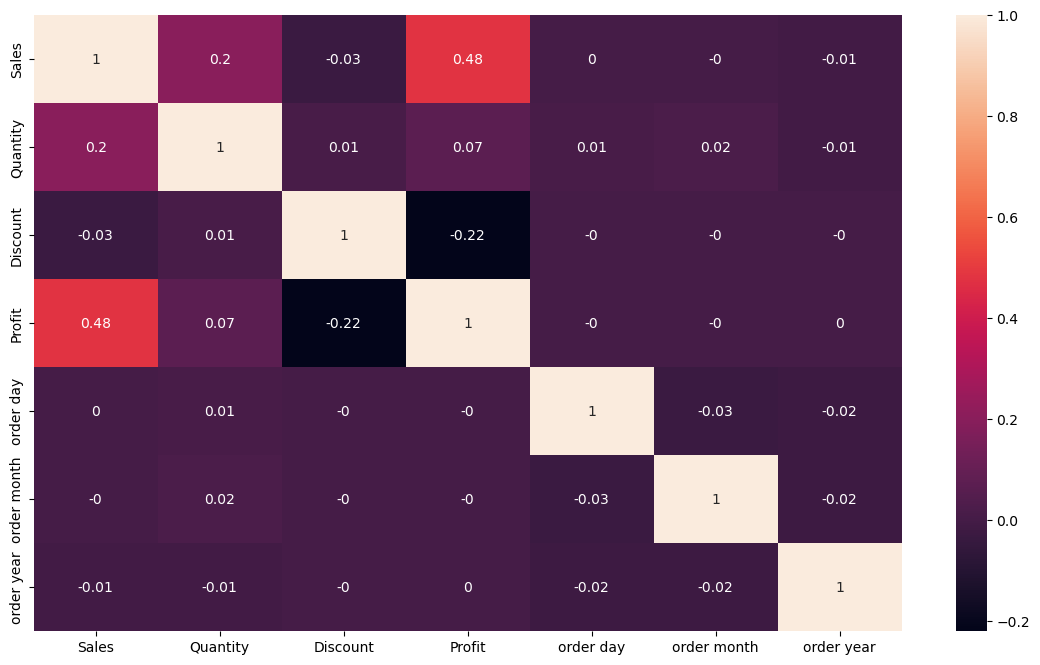

In [16]:
plt.figure(figsize = (14,8))
sns.heatmap(np.round(store_rel.corr(), 2), annot = True)

##### From above chart seeing that profit and sales has the highest correlation of 0.48, I visualized this relationship using a scattered plot

<Axes: xlabel='Sales', ylabel='Profit'>

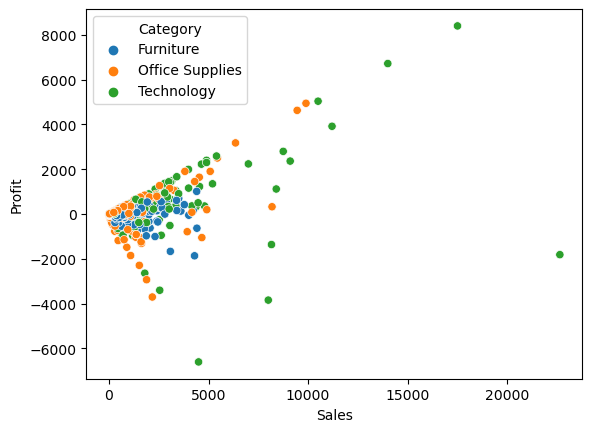

In [17]:
sns.scatterplot(x = 'Sales', y = 'Profit', data = store, hue='Category')

### Observation
There is no strong correlation between the numerical variables in the dataset


#### Which city did we have the highest sales

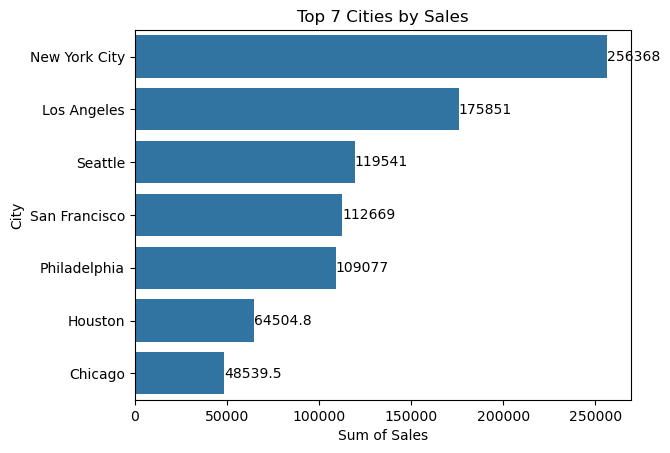

In [60]:
TopCity = store.groupby(['City'])['Sales'].sum().nlargest(7)
TopCity

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= TopCity.values, y=TopCity.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 7 Cities by Sales")
#plt.ylabel('Restaurant names')
plt.xlabel('Sum of Sales')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

Next, I checked which city had the highest number of orders. This will be a good indicator of the city with the largest customer base or where our store is very popular

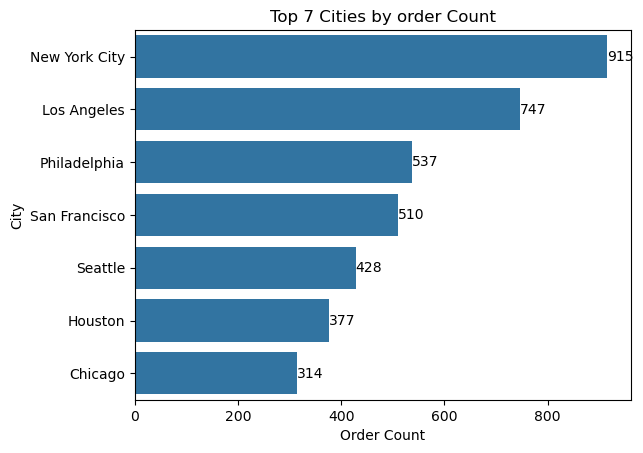

In [61]:
top_order_city = store.groupby(['City'])['City'].count().nlargest(7)

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= top_order_city.values, y=top_order_city.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 7 Cities by order Count")
#plt.ylabel('Restaurant names')
plt.xlabel('Order Count')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

Next, I checked the city with top average sales price. This is a good indicator of where we should sale more for greater profit.

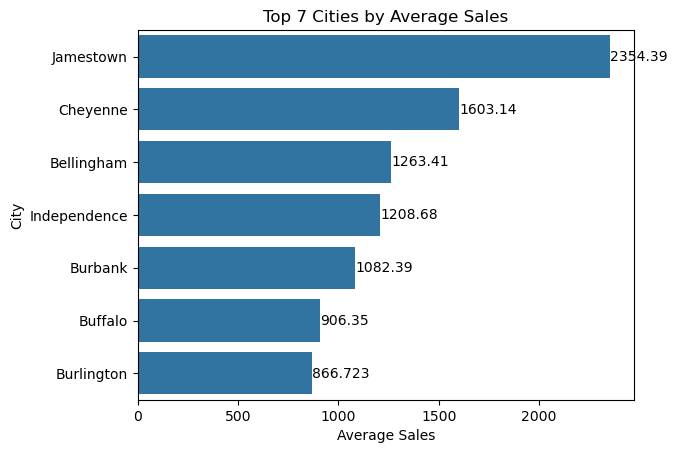

In [62]:
top_mean_sales = store.groupby(['City'])['Sales'].mean().nlargest(7)

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= top_mean_sales.values, y=top_mean_sales.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 7 Cities by Average Sales")
#plt.ylabel('Restaurant names')
plt.xlabel('Average Sales')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

Knowning that mean could be affected by outliners, I used the median to validate the result in the above visulation.

In [21]:
store.groupby(['City'])['Sales'].median().nlargest(7)

City
Jamestown       2354.395
Cheyenne        1603.136
Burbank         1279.968
Independence    1208.685
Bellingham      1099.500
Appleton         835.655
Lehi             758.363
Name: Sales, dtype: float64

Next, I checked if these cities above have the highest average profit. This will be a good indicator of cities where we need to expand sales and host more campgain to increase sales and profitablity.

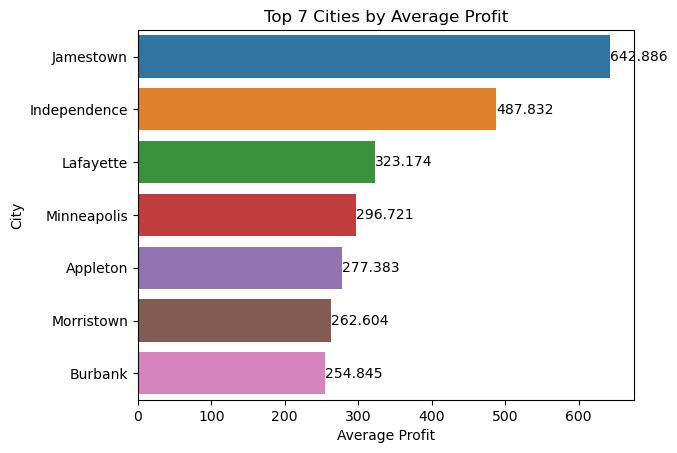

In [80]:
top_mean_profit= store.groupby(['City'])['Profit'].mean().nlargest(7)

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= top_mean_profit.values, y=top_mean_profit.index)

# Adding title and axis labels
plt.title("Top 7 Cities by Average Profit")
#plt.ylabel('Restaurant names')
plt.xlabel('Average Profit')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

Next, I tried to identify if this trend is region based

In [76]:
store.groupby(['Region', 'City'])['Profit'].mean().sort_values(ascending=False).head(7)

Region   City        
Central  Lafayette       748.008108
East     Jamestown       642.885750
Central  Independence    487.831500
         Minneapolis     296.721070
         Appleton        277.383150
East     Morristown      262.603871
West     Burbank         254.844600
Name: Profit, dtype: float64

### Observation
- We have a large New York, Los Angeles, Philadephia, and San Francisco customer base.
- We have a potential sale opportunity in the central region in cities like Lafayette, Independence, Minneapolis, and Appleton
- We also have potential market opportunities in the east region in cities like Jamestown and Morristown.
- A good making strategy will be to optimize our stores in New York, Los Angeles, Philadephia, and San Francisco while embarking on aggressive market campaigns in key cities like Jamestown Lafayette, Independence, Minneapolis Appleton, and Morristown which show high-profit potential.

#### Which category made the most profit?

In [23]:
store['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

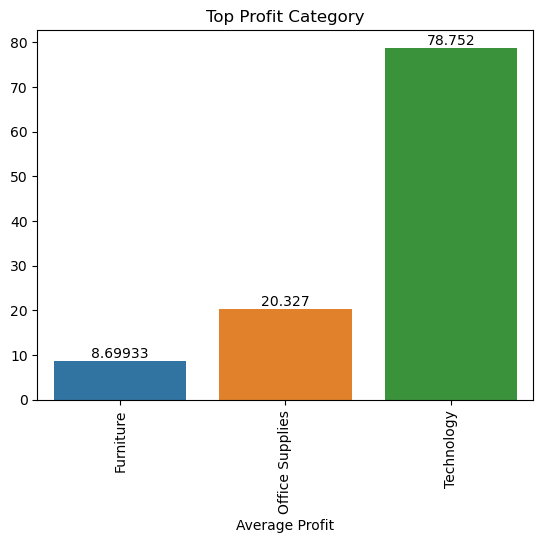

In [83]:
top_profit_category= store.groupby(['Category'])['Profit'].mean()

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(y= top_profit_category.values, x=top_profit_category.index)

# Adding title and axis labels
plt.title("Top Profit Category")
#plt.ylabel('Restaurant names')
plt.xlabel('Average Profit')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=90)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

In [24]:
store.groupby(['Category'])['Profit'].median().sort_values(ascending=False)

Category
Technology         25.0182
Furniture           7.7748
Office Supplies     6.8824
Name: Profit, dtype: float64

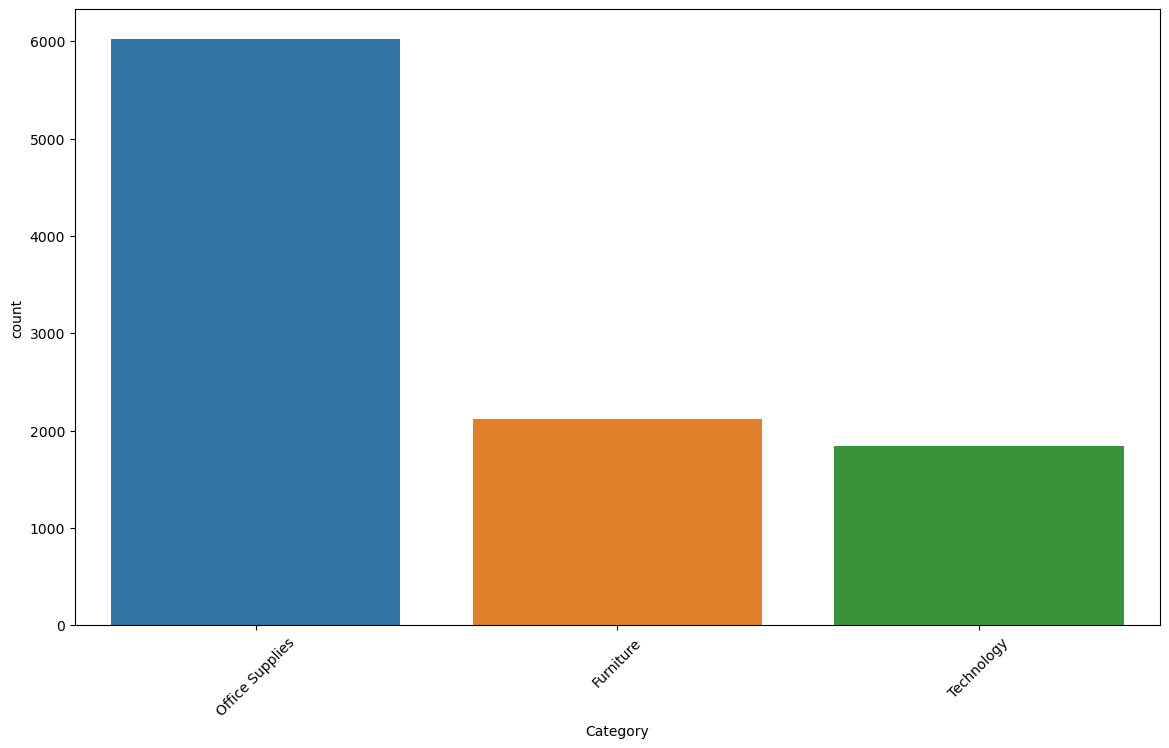

In [97]:
plt.figure(figsize=(14,8))
sns.countplot(data=store, x='Category',
                order = store['Category'].value_counts().index)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

### Observation
- The technology category made the highest amount of profit although they had the lowest count of sales
- Most of our high ticket sales are in the technology category, hence there might be a need to train our sales person on how to close technology sales as it bring in the most profit

#### find the mean discount and visualize it

In [26]:
np.mean(store['Discount'])

0.15620272163297977

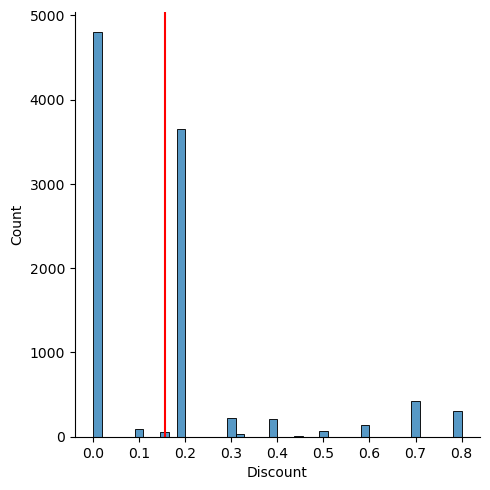

In [27]:
sns.displot(store['Discount'], kde=False)
plt.axvline(x= np.mean(store['Discount']), color='red')
plt.show()

#### What is the relationship between discount and profit?

<Axes: xlabel='Discount', ylabel='Profit'>

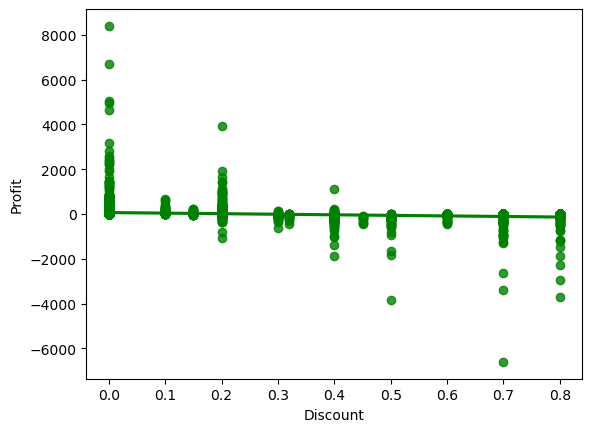

In [25]:
sns.regplot(x = 'Discount', y = 'Profit', data = store, color= 'green')

### Observation
- The average discount of most sales is about 16%, with the majority of sales made at either 0% or 20% discount.
- From the chart, we can infer that a discount above 20% results in a loss more often than it results in profit.

#### Define custom function for indept analysis

In [28]:
def return_countplot(column, hue_name = None):
    return sns.countplot(x=column, data=store, hue=hue_name)

In [29]:
def return_boxplot(x_column, y_column):
    return sns.boxplot(x=x_column, y=y_column, data=store)

In [30]:
def return_lineplot(x_column, y_column, hue_name=None,style_name=None ):
    return sns.lineplot(x=x_column, y=y_column, hue=hue_name, style=style_name, data=store)

In [31]:
def return_relplot(x_col, y_col, col_name=None,row_name=None, rel_type=None, hue_name=None, style_name=None):
    return sns.relplot(x=x_col, y=y_col, col=col_name, row=row_name, kind=rel_type, hue=hue_name, style=style_name, data=store)

## Problem statement 
### level 2
1. Analyze the profit of various categories
2. Analyse the trend of sales by months and year
3. How much sales occurs in each and every category with respect to each and every month

In [98]:
#### Analyze the profit of various categories

<Axes: xlabel='Category', ylabel='Profit'>

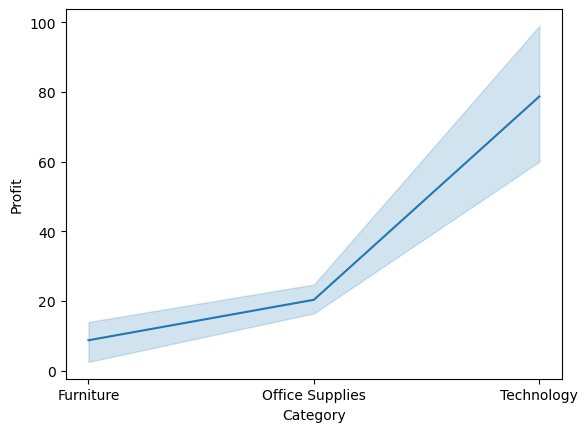

In [32]:
return_lineplot('Category','Profit')

#### Analyse the trend of sales by months and year

<Axes: xlabel='Category', ylabel='Profit'>

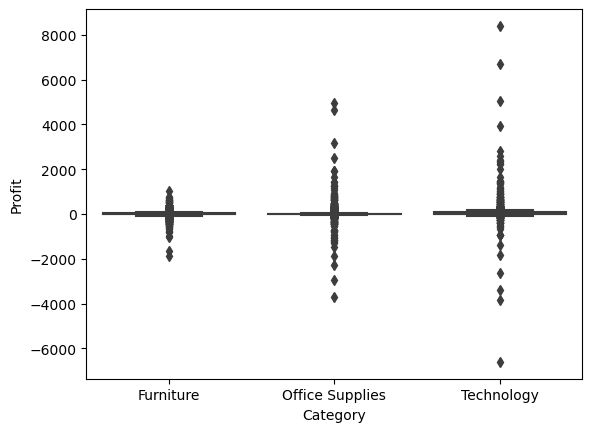

In [33]:
return_boxplot('Category','Profit')

<Axes: xlabel='order month', ylabel='Sales'>

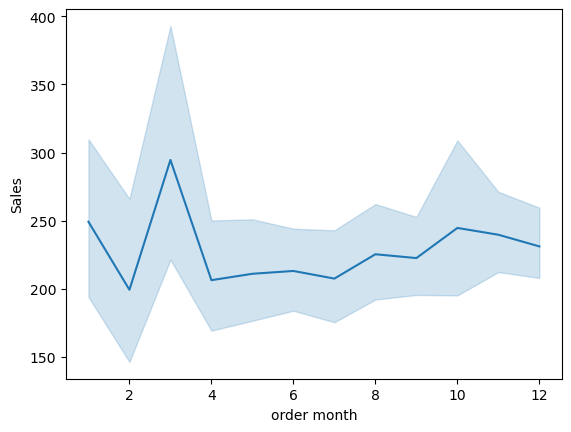

In [34]:
return_lineplot('order month','Sales')

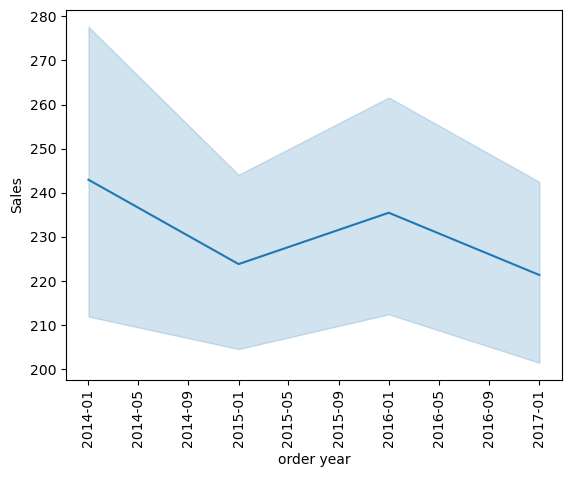

In [89]:
store['order year'] = pd.to_datetime(store['order year'], format='%Y')
ax= return_lineplot('order year','Sales')
plt.xticks(rotation=90)
plt.show()

#### How much sales occurs in each and every category with respect to each and every month

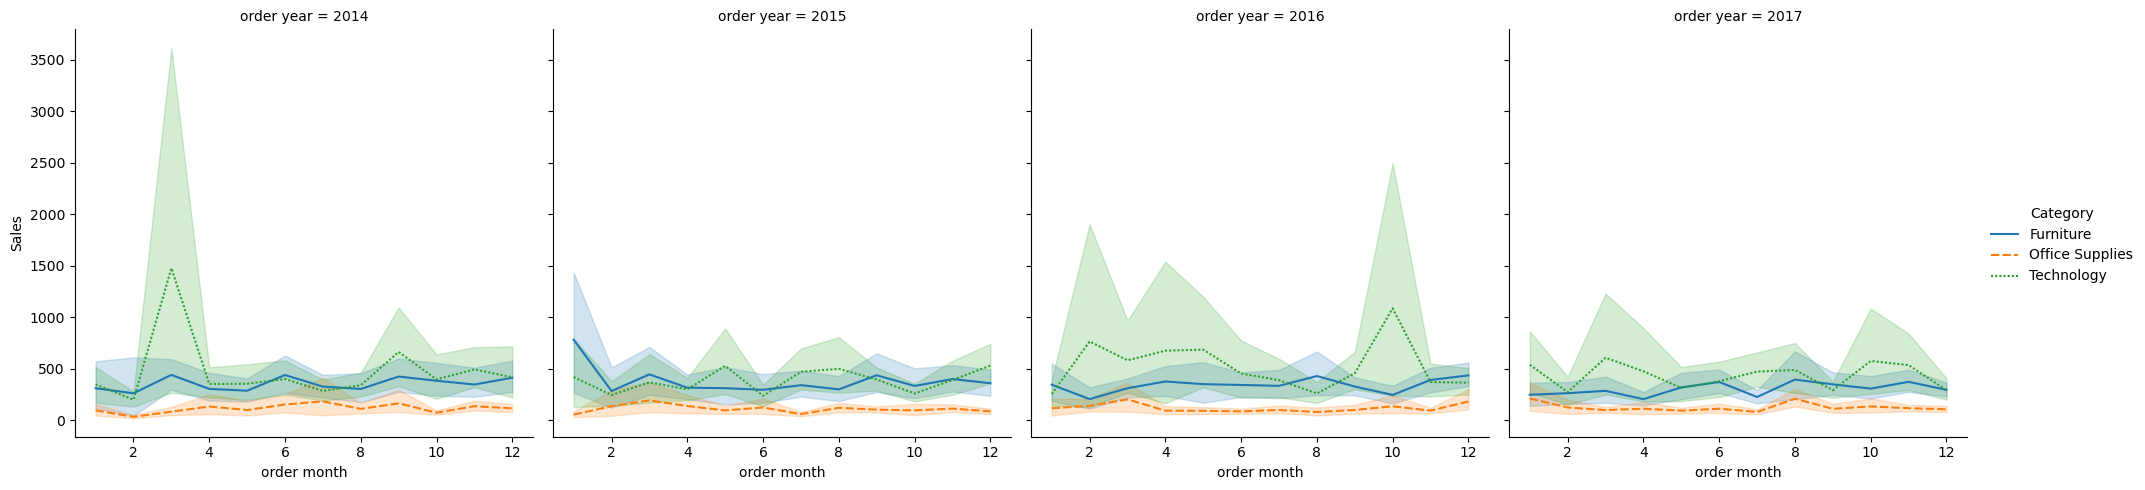

In [35]:
return_relplot('order month', 'Sales', col_name='order year', rel_type='line', hue_name='Category', style_name='Category')

### Observation
- Sales saw an all-time high in the technology category around March 2014.
- Sales of other categories have remained relatively linear between 2014 - 2015.



### Level 3
1. Relationship between Profit and Product Sub-category
2. Visulaze how customers prefer to ship their other
3. Does customer segement infleunce sales
4. Display some popular brand in our products based on customer order

#### Relationship between Profit and Product Sub-category

In [93]:
store.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order day,order month,order year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,11,2016-01-01


In [38]:
store['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

First, we get the 5 point summary of quantity ordered by sub-category using a boxplot.

<Axes: xlabel='Quantity', ylabel='Sub-Category'>

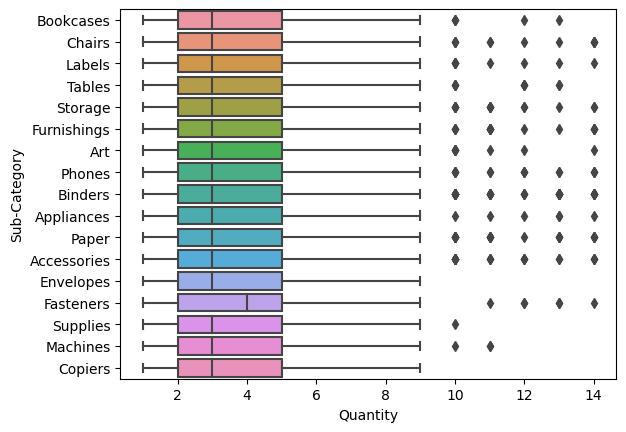

In [39]:
return_boxplot('Quantity', 'Sub-Category')

Next, I checked which sub-category has the highest order count.

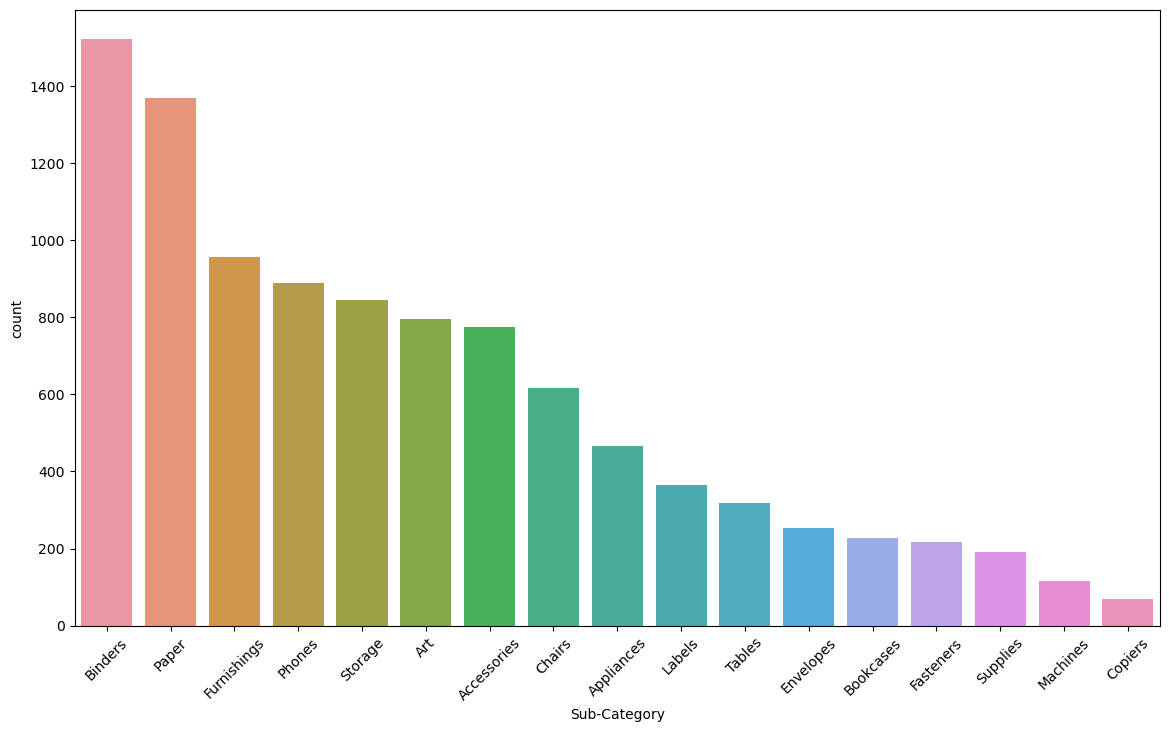

In [40]:
plt.figure(figsize=(14,8))
sns.countplot(data=store, x='Sub-Category',
                order = store['Sub-Category'].value_counts().index)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

Now, I checked the relationship between profit and the different sub-category using a relationplot.

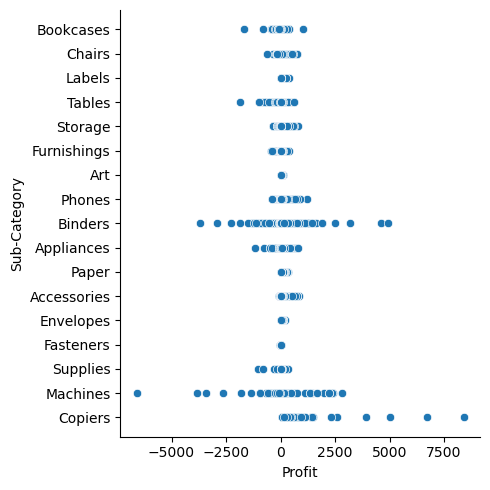

In [41]:
return_relplot('Profit', 'Sub-Category', rel_type ='scatter')

Next, I created a barchart showing the most profitable sub-category

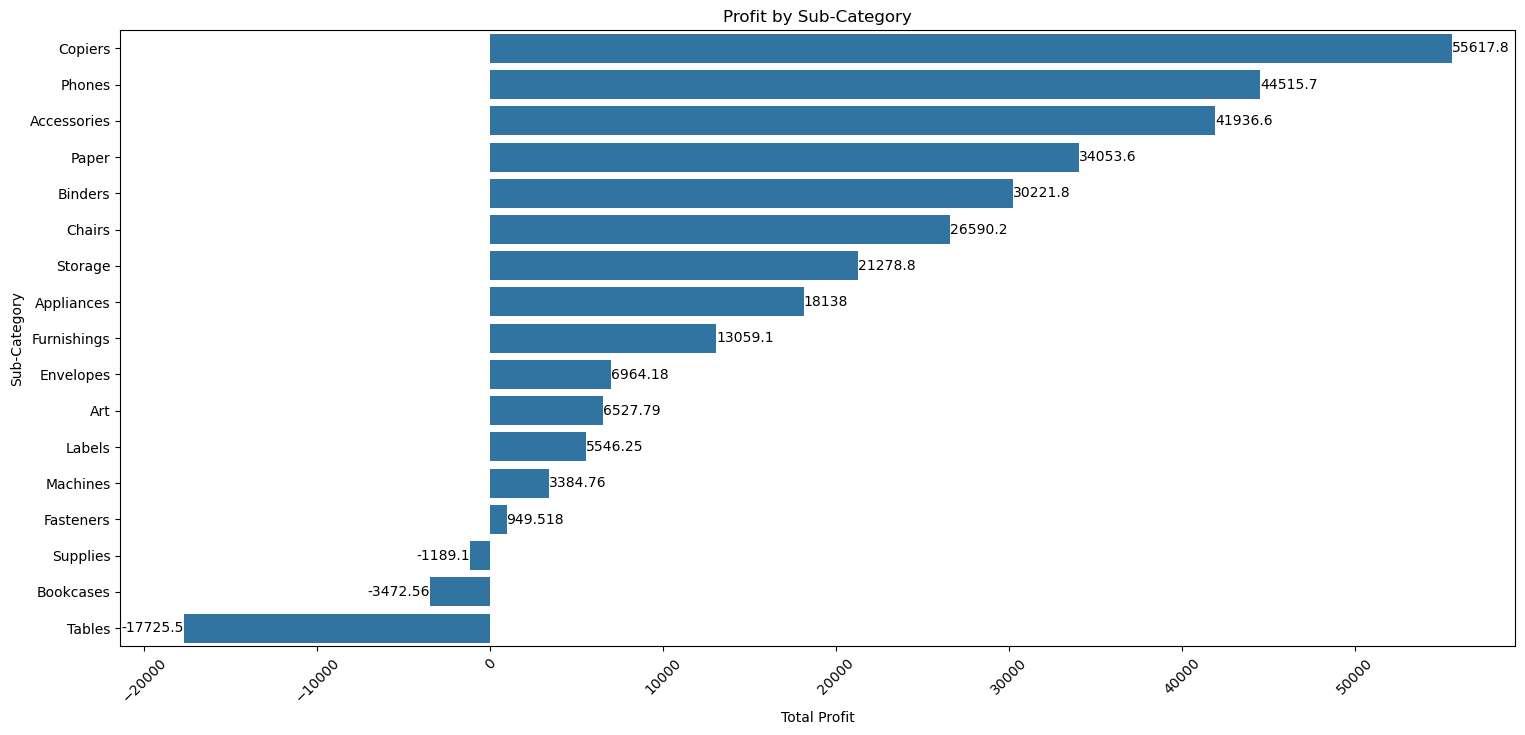

In [131]:
sub_cat_profit = store.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(18, 8))  # Adjust the figure size as per your preference
ax = sns.barplot(x= sub_cat_profit.values, y=sub_cat_profit.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Profit by Sub-Category")
#plt.ylabel('Restaurant names')
plt.xlabel('Total Profit')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=45)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

### Observation
- Copiers, phones, accessories, paper, and binders brought in the highest amount of profit over time.
- We need to develop a marketing strategy to sell more copiers considering they have the highest profit and have the lowest order count.
- We will need to review our sales of tables to see if it can be improved or needs to be discontinued since it shows a low number of orders and the highest loss overtime estimates at -17,725 dollars


#### Visulaze how customers prefer to ship their other

<Axes: xlabel='Ship Mode', ylabel='count'>

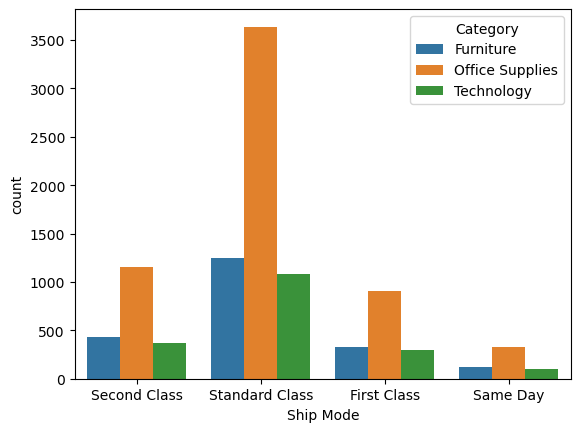

In [43]:
return_countplot('Ship Mode', hue_name='Category')

### Observation
- The majority of our customers use standard class shipping mode.
- In all shipping mode, office supplies are the most shipped commodity ordered by our clients.

#### Does customer segement infleunce sales

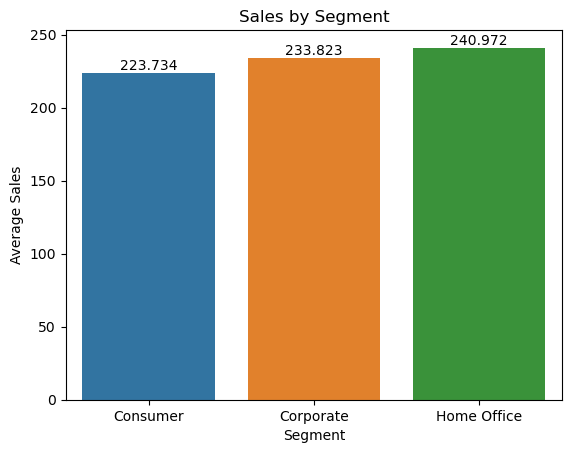

In [72]:
top_mean_segment= store.groupby('Segment')['Sales'].mean()
 
# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(y= top_mean_segment.values, x=top_mean_segment.index)

# Adding title and axis labels
plt.title("Sales by Segment")
#plt.ylabel('Restaurant names')
plt.ylabel('Average Sales')

ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

from the above plot I observed that the home office segment has the highest mean sales, however, the different in avaerage sales per segment is not far apart. I validated this using the median data to check for the effect of outliners.

In [45]:
store.groupby('Segment').agg({'Sales': 'median'})

,Sales
Segment,
Consumer,53.72
Corporate,56.54
Home Office,52.44


Next, I preformed a strip plot to visualize the distribution of sale from similar category in different segment.

<Axes: xlabel='Segment', ylabel='Sales'>

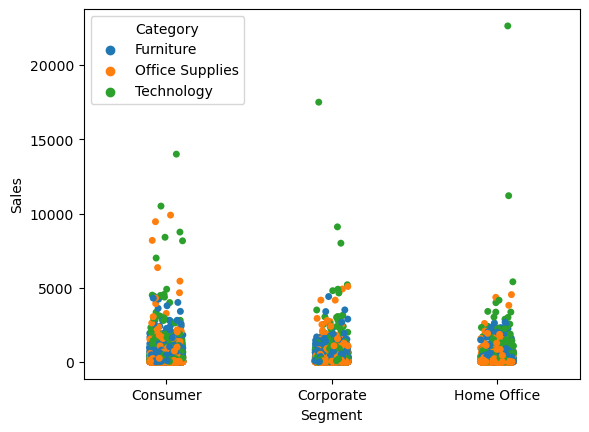

In [46]:
sns.stripplot(data=store, x='Segment', y='Sales', hue='Category')

#### Display some popular brand in our products based on customer order

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [65]:
#product_words= ' '.join(store['Product Name'])
text = " ".join(name for name in store['Product Name'])
# print ("There are {} words in the combination of all review.".format(len(text)))
print (f"There are {len(text)} words in the combination of all review.") 

There are 378932 words in the combination of all review.


In [49]:
store['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

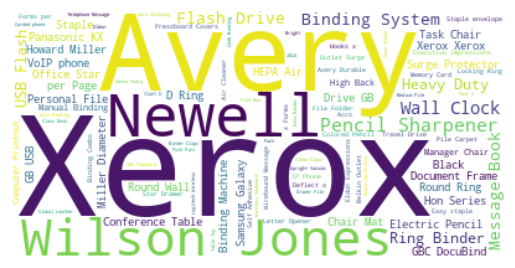

In [50]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 ## Conclusion and Actionable insights
 
* We aim to leverage our strong customer base in New York, Los Angeles, Philadelphia, and San Francisco, while strategically pursuing sales in the central region cities of Lafayette, Independence, Minneapolis, and Appleton, as well as exploring market opportunities in the east region cities like Jamestown and Morristown for an optimized and profitable business strategy

* Despite having the lowest sales count, the technology category emerged as the most profitable, indicating a potential need for sales personnel training to capitalize on high-ticket technology sales and maximize overall profits.

* The technology category experienced a peak in sales around March 2014, while sales in other categories remained relatively consistent and linear from 2014 to 2015.

* The majority of sales exhibit an average discount of around 16%, with a common occurrence of either 0% or 20% discounts; the chart suggests that discounts exceeding 20% more frequently lead to losses than profits.

* Over time, copiers, phones, accessories, paper, and binders have consistently yielded the highest profits; therefore, a focused marketing strategy is essential to boost sales of copiers, considering their high profitability despite a low order count. Conversely, a review of table sales is warranted due to a low order count and the highest loss estimate at -17,725 dollars, determining whether improvements are possible or discontinuation is necessary.

* Most of our customers prefer the standard class shipping mode, and across all shipping modes, office supplies consistently emerge as the most frequently ordered commodity by our clients.
